# MMC Wind farm post processing

In [1]:
# Load the modules

# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)
import MMCutil as writeMMC
import postproamrwindsample_xarray as ppsamplexr

# Load the libraries
import numpy as np
import pandas as pd
import amrwind_frontend as amrwind
import matplotlib.pyplot    as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import CubicSpline

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
rundir = '/nscratch/lcheung/FLOWMAS/microscale_surrogate_wakes/MMCdemo_neutral1_farmrun1/'
inpfile = 'MMCdemo_Farmrun1_10x10_baseline.inp'

In [3]:
# Start the AMR-Wind case
case = amrwind.MyApp.init_nogui()
# Load the starting point
case.loadAMRWindInput(rundir+'/'+inpfile)

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


OrderedDict()

In [4]:
# Get the turbine positions
allturbnames = case.listboxpopupwindict['listboxactuator'].getitemlist()
allturbines  = case.listboxpopupwindict['listboxactuator']
keystr       = lambda n, d1, d2: d2.name
turbxy = []
for name in allturbnames:
    tdict = allturbines.dumpdict('AMR-Wind',subset=[name], keyfunc=keystr)
    turbxy.append(tdict['Actuator_base_position'])
print(turbxy)

[[2219.468804, 5011.613101, 0.0], [3603.927852, 4615.540953, 0.0], [4988.386899, 4219.468804, 0.0], [2615.540953, 6396.072148, 0.0], [4000.0, 6000.0, 0.0], [5384.459047, 5603.927852, 0.0], [3011.613101, 7780.531196, 0.0], [4396.072148, 7384.459047, 0.0], [5780.531196, 6988.386899, 0.0]]


In [5]:
postprodir= rundir+'/post_processing'
iters     = [1800]         # timesteps to extract
varnames  = ['velocityx', 'velocityy']  # variables to extract
hhdb      = ppsamplexr.getPlaneXR(postprodir+'/turbdomain_20000.nc', iters, varnames, verbose=1, gettimes=True)

extracting iter 1800


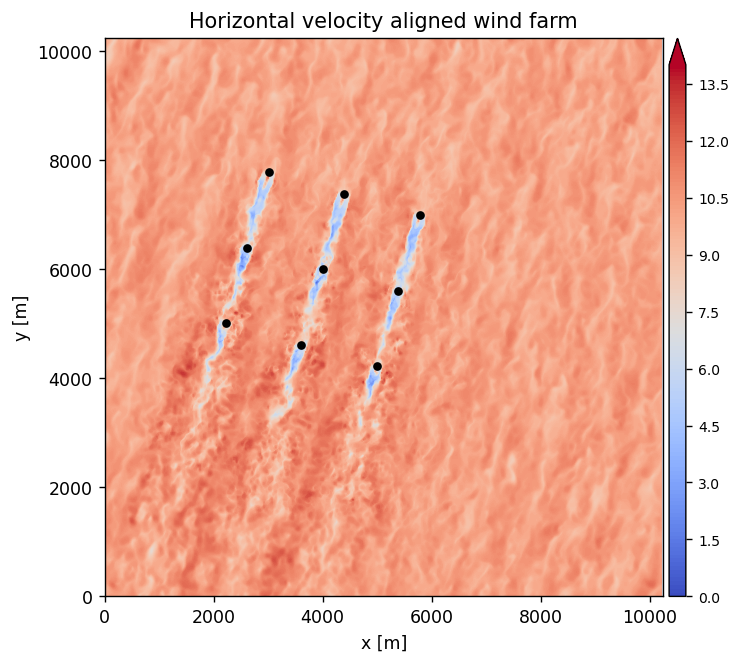

In [6]:
#plt.figure(figsize=(5,4), dpi=125)
fig, ax = plt.subplots(1,1,figsize=(6,6), dpi=125)
clevels=np.linspace(0, 14,141)
iplane=0
i=iters[0]
Uh=np.sqrt(hhdb['velocityx'][i][iplane,:,:]**2+hhdb['velocityy'][i][iplane,:,:]**2)
c=ax.contourf(hhdb['x'][iplane,:,:], hhdb['y'][iplane,:,:], Uh, levels=clevels, cmap='coolwarm', extend='max')

for t in turbxy:
    plt.plot(t[0], t[1], 'k.', markersize=8)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=8)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
#ax.set_title('Horizontal velocity t=%0.1fs'%hhdb['times'][0])
ax.set_title('Horizontal velocity aligned wind farm')
ax.set_aspect('equal')

In [7]:
swdb      = ppsamplexr.getPlaneXR(postprodir+'/swdomain_20000.nc', iters, varnames, verbose=1, gettimes=True)

extracting iter 1800


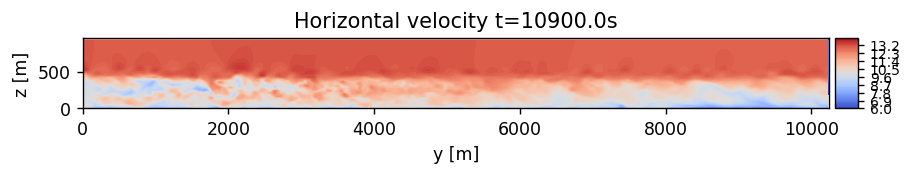

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,4), dpi=125)
clevels=np.linspace(6, 14,81)
iplane=0
i=swdb['timesteps'][0]
Uh=np.sqrt(swdb['velocityx'][i][iplane,:,:]**2+swdb['velocityy'][i][iplane,:,:]**2)
c = ax.contourf(swdb['y'][iplane,:,:], swdb['z'][iplane,:,:], Uh, levels=clevels, cmap='coolwarm')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=8)

ax.set_xlabel('y [m]')
ax.set_ylabel('z [m]')
ax.set_title('Horizontal velocity t=%0.1fs'%swdb['times'][0])
ax.set_aspect('equal')